In [1]:
# Stock Pivot Resistance

Enter a stock symbol (or type 'quit' to exit):  SBIN.NS


[*********************100%%**********************]  1 of 1 completed


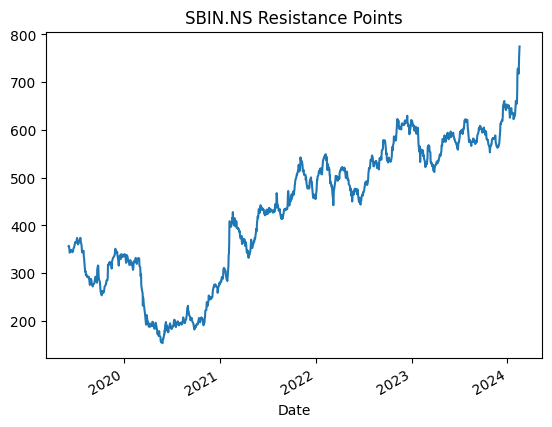

Enter a stock symbol (or type 'quit' to exit):  history


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['HISTORY']: Exception('%ticker%: No timezone found, symbol may be delisted')


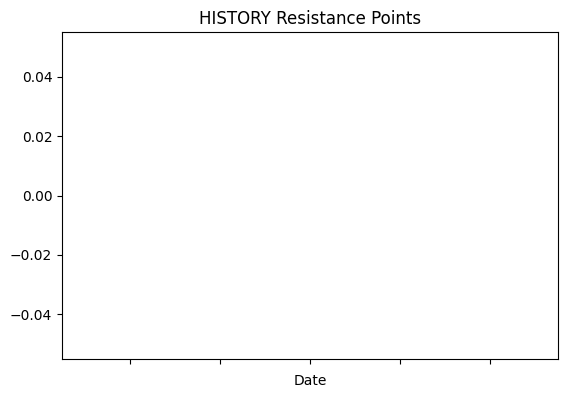

Enter a stock symbol (or type 'quit' to exit):  history


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['HISTORY']: Exception('%ticker%: No timezone found, symbol may be delisted')


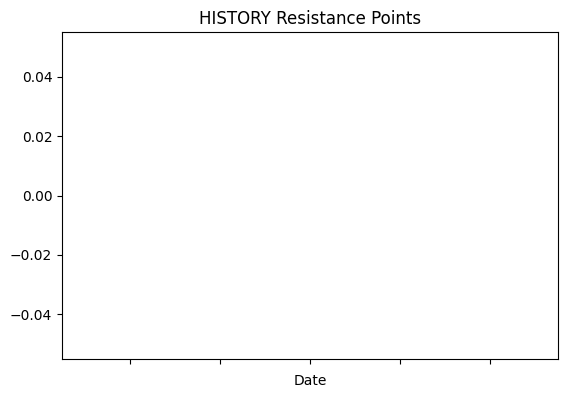

In [ ]:
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt

# Function to fetch and plot stock data with pivot points
def plot_stock_pivot_resistance(stock_symbol, start_date, end_date):
    # Fetch stock data using yfinance
    df = yf.download(stock_symbol, start=start_date, end=end_date)

    # Plot high prices
    df["High"].plot(label="High")

    # Initialize variables to find and store pivot points
    pivots = []
    dates = []
    counter = 0
    last_pivot = 0
    window_size = 10
    window = [0] * window_size
    date_window = [0] * window_size

    # Identify pivot points
    for i, high_price in enumerate(df["High"]):
        window = window[1:] + [high_price]
        date_window = date_window[1:] + [df.index[i]]

        current_max = max(window)
        if current_max == last_pivot:
            counter += 1
        else:
            counter = 0

        if counter == 5:
            last_pivot = current_max
            last_date = date_window[window.index(last_pivot)]
            pivots.append(last_pivot)
            dates.append(last_date)

    # Plot resistance levels for each pivot point
    for i in range(len(pivots)):
        time_delta = dt.timedelta(days=30)
        plt.plot_date([dates[i], dates[i] + time_delta],
                      [pivots[i], pivots[i]],
                      linestyle="-", linewidth=2, marker=",")

    # Configure plot settings
    plt.title(stock_symbol.upper() + ' Resistance Points')
    plt.gcf().autofmt_xdate()
    plt.subplots_adjust(bottom=0.2)
    plt.show()

# Main execution loop
if __name__ == "__main__":
    start_date = dt.datetime(2019, 6, 1)
    end_date = dt.datetime.now()

    while True:
        stock_symbol = input("Enter a stock symbol (or type 'quit' to exit): ")
        if stock_symbol.lower() == "quit":
            break
        plot_stock_pivot_resistance(stock_symbol, start_date, end_date)
